# Project CIE539

Demand analysis is an important part of transportation systems management. The aim of this project is to illustrate the demand modeling process for the commute trips in New York City. Data from the household travel survey called the Citywide Mobility Survey (CMS) will be used to assess New York City residents' travel behavior, preferences, and attitudes. 
Project should be performed individually; final report should be submitted as a pdf file of fully executed Jupyter Notebook following provided template. In addition, each student should present assigned sections in class in accordance with presentation schedule. Presentations will be held in the end of the class on the assigned day, every student will have 5 minutes to present. $Jupyter Notebook$ and Slide deck (if any) should be submitted to the UB BrightSpace the day before the presentation. 
 


# Project Description 

The aim of this project is to analyze current and future transportation demand of commute trips at New York City, understand the usage of transit and bicycle travel modes, and explore transportation barriers at New York City. Each student will develop several models that analyze and predict current and future travel demand for **commute trips** on **working days**. This process will include the following steps: explore the 2022 NYC travel data, predict future trips produced and attracted by each zone, conduct trip distribution step for predicted trips, develop a discrete choice model using the survey data for at least three pairs of origin-destination zones, and discuss results.



# Project Content

**Introduction**

* Background on Travel Demand Management and Forecasting (0.5 page)
 
    Discuss the motivations for and objectives of travel demand management and forecasting. Briefly discuss common practices used to evaluate current and predict future demand.

* Motivation for New Your City Case Study (0.3 page)

    Why New Your City is a good case study for demand forecasting? How commute trips in New Your City different from majority of the U.S.

* Short Introduction into Four Step Process (0.3-0.5 page)

    Discuss four step process, its origin, significance, required data and knowledge, briefly introduce each step.

**Part 1: Project Data**
<font color='blue'> Presentaiton day: November 25, 2025 </font>

* Data Upload
  
    Properly upload all required data sets. 

* Understanding Data on Participated Households, Persons, and Vehicles <font color='red'> 2 presenters </font>
  
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

* Understanding Trip Data <font color='red'> 2 presenters </font>
  
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

* Exploring Zones
  
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.

**Part 2: Cross-Classification to Predict Future Trips** <font color='red'> 1 presenter </font>
<font color='blue'> Presentaiton day: December 2, 2025 </font>

* Select attributes for the classification, create data set for the analysis, and identify average number of trips made by each group for 2022. Create future trip production based on assumed modifications of the future households and identify number of trips produced by each zone in the future. For trip attraction, consider the same share as in 2022, with total number of trips same as future production.
  
* Cross-Classification Results Discussion
  
    How future number of trips will change? How you CC analysis can be improved?

**Part 3: Trip Distribution**  <font color='red'> 1 presenter </font>
<font color='blue'> Presentaiton day: December 2, 2025 </font>

* Choose approach to conduct trip distribution step for the future transportation demand, prepare data for this step and implement it.
  
* Trip Distribution Results Discussion

    How future distribution is different compared to trip distribution in 2022? Provide at least 1 graph to support your discussion. 

**Part 4: Build a Mode Choice Model** <font color='red'> 2 presenters </font>
<font color='blue'> Presentaiton day: December 2, 2025 </font>

* Choose Model and Estimated Parameters 
  
    Build a discrete choice models for at least 2 OD pairs for 2022 data.

* Discuss Resulted Model Validity  
  
    Only reasonable models should be included in the report. To increase the likelihood to generate the model with a good fit, use OD-pairs with largest number of predicted trips. Discuss R-squired, intercept value, signs and significance of estimated parameters.

* Mode Choice Model Results Discussions  
  
    Discuss multiple noticeable observations based on estimated parameters: what unexpected significant factors you have found? Is there a difference in the models for different evaluated OD-pairs? 

**Part 5: Additional Topic (Select Only One)**  <font color='red'>(1 presenter per topic) </font>
<font color='blue'> Presentaiton day: December 4, 2025 </font>

1)	New Yorkers’ Commute behavior: 

    Discuss commute trip time and day distribution, used modes, commute origin and destination, choose at least 3 different person and hh characteristics and explore difference in commute behavior between participants based on those characteristics. Provide at least 3 graphs to support your discussion.

2)	New Yorkers’ Experiences of and Opinions on Walking and Transit usage: 

    Discuss the use of transit and walking by New Yorkers, including frequency, trip purpose, age distribution, etc. Provide at least 3 graphs to support your discussion.

3)	New Yorkers’ Experiences of and Opinions on Bicycle mode and Micro-Mobility: 

    Discuss the use of bicycle and other micromobility modes by New Yorkers, including frequency, age distribution, trip purpose, etc. Provide at least 3 graphs to support your discussion.

4)	The Equity of Access to Transportation across the City: 

    Explore the difference in number of trips and used modes between different demographics (male vs. female, disability status, household income). Provide at least 3 graphs to support your discussion.

**Conclusions**

    Discuss your project experience, how you have benefited from the project.







# Introduction
## Background on Travel Demand Management and Forecasting

## Motivation for New Your City Case Study

## Short Introduction into Four Step Process

# Part 1: Project Data 

In part 1, we will demonstrate comprehensive understanding of data on participated households, persons, and vehicles, including trip data.

* Data Upload
  
    Properly upload all required data sets. 

* Understanding Data on Participated Households, Persons, and Vehicles
  
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

* Understanding Trip Data
  
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

* Exploring Zones
  
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
import statsmodels.api as sm
import scipy as sp

## Data Upload

In [ ]:
#### Store the url string that hosts our .csv files 
#### Copy data files to the 2022CMS folder that should be in the same folder as this notebook
urlday = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Day_2022.csv"
urlhhl = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Household_2022.csv"
urlper = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Person_2022.csv"
urlzon = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Survey_Zones.csv"
urltrp = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Trip_2022.csv"
urlveh = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Vehicle_2022.csv"

#### Read the .csv file using `pandas` libriary and store it as a `pandas` Data Frame
dday = pd.read_csv(urlday)
dhhl = pd.read_csv(urlhhl)
dper = pd.read_csv(urlper)
dzon = pd.read_csv(urlzon)
dtrp = pd.read_csv(urltrp)
dveh = pd.read_csv(urlveh)

#### Finally, let's make sure that all columns are displayed
pd.set_option('display.max_columns', None)

In [ ]:
dday.head(3)

In [ ]:
dhhl.head(3)

In [ ]:
dper.head(3)

In [ ]:
dzon.head(3)

In [ ]:
dtrp.head(3)

In [ ]:
dveh.head(3)

In [ ]:
for i in range(len(dhhl.columns)):
    print(dhhl.columns[i])

hh_id
hh_cms_zone_gp
participation_group
signup_platform
diary_platform
num_days_complete
num_days_complete_weekday
num_days_complete_weekend
num_complete_mon
num_complete_tue
num_complete_wed
num_complete_thu
num_complete_fri
num_complete_sat
num_complete_sun
num_people
r_num_people
num_adults
num_kids
num_students
num_workers
num_vehicles
r_num_vehicles
num_trips
income_broad
primary_language
residence_type
residence_rent_own
home_county
vehicle_change
reduced_veh_1
reduced_veh_2
reduced_veh_3
reduced_veh_4
reduced_veh_5
reduced_veh_6
reduced_veh_7
reduced_veh_8
reduced_veh_997
increased_veh_1
increased_veh_2
increased_veh_3
increased_veh_4
increased_veh_5
increased_veh_6
increased_veh_7
increased_veh_8
increased_veh_997
ev_typical_charge_1
ev_typical_charge_2
ev_typical_charge_3
ev_typical_charge_4
ev_typical_charge_5
ev_typical_charge_6
ev_typical_charge_7
ev_typical_charge_997
ev_purchase
ev_purchase_barriers_1
ev_purchase_barriers_2
ev_purchase_barriers_3
ev_purchase_barriers_4
e

In [ ]:
dhhl = dhhl[(dhhl['income_broad'] != 995) & (dhhl['income_broad'] != 999)]
dhhl.head(10)

,hh_id,hh_cms_zone_gp,participation_group,signup_platform,diary_platform,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight
0,22000050,1,9,rmove,rmove,5,4,1,1,1,1,0,1,1,0,3,3,3,0,1,1,1,1,4,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,359.540113
1,22000105,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,1,0,0,61,3,1,2,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,4,1723.260580
2,22000128,1,9,rmove,rmove,6,4,2,1,1,0,1,1,1,1,5,5,3,2,0,1,1,1,53,4,1,4,2,36005,2,995,995,995,995,995,995,995,995,995,0,1,0,0,1,1,1,1,0,995,995,995,995,995,995,995,995,3,1,0,0,0,0,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,2,1163.731813
3,22000430,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,30,3,1,4,2,36005,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,997,203.870573
4,22000460,1,9,rmove,rmove,5,4,1,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0,9,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,177.370464
5,22000533,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,2,0,0,41,2,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,959.715717
6,22000607,1,3,browser,rmove,7,5,2,1,1,1,1,1,1,1,3,3,2,1,0

In [ ]:
def income_level(x):
    if x in [1,2]:
        return "Low-Income"
    elif x in [3,4]:
        return "Middle-Income"
    else:
        return "High-Income"

dhhl['income_level'] = dhhl['income_broad'].apply(income_level)
dhhl_income = dhhl.groupby('income_level').size()
print(f"income distribution:\n{dhhl_income}")

income distribution:
income_level
High-Income      1060
Low-Income        784
Middle-Income     797
dtype: int64


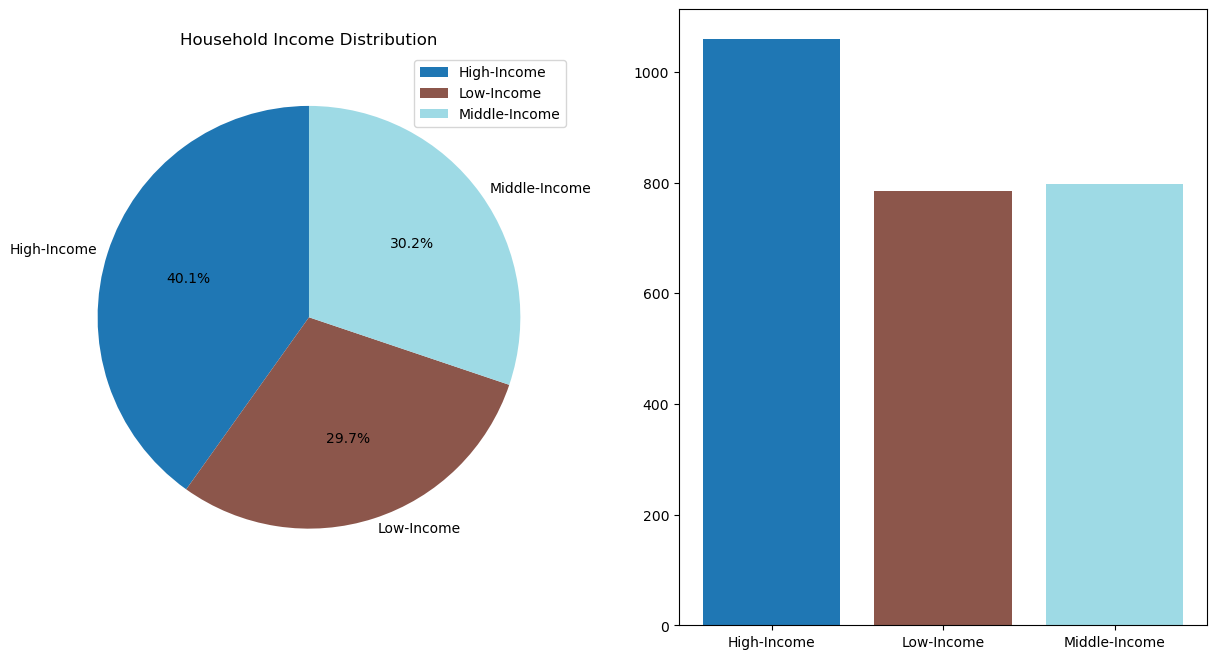

In [ ]:
labels = dhhl_income.index
sizes = dhhl_income.values

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(sizes)))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.6, labeldistance=1.05, colors=colors)


plt.title('Household Income Distribution')
plt.legend(loc='best')


plt.subplot(1,2,2)
plt.bar(x=labels, height=sizes, color=colors)
plt.show()


In [ ]:
dhhl=dhhl[dhhl['primary_language'].isin([1,2,3,4])]


language = {1:'English',
            2:'Spanish',
            3:'Chinese',
            4:'Russian'}

dhhl['language'] = dhhl['primary_language'].map(language)
dhhl_language = dhhl.groupby('language').size()

print(f'Primary language distribution:\n{dhhl_language}')


Primary language distribution:
language
Chinese     120
English    2194
Russian      30
Spanish     171
dtype: int64


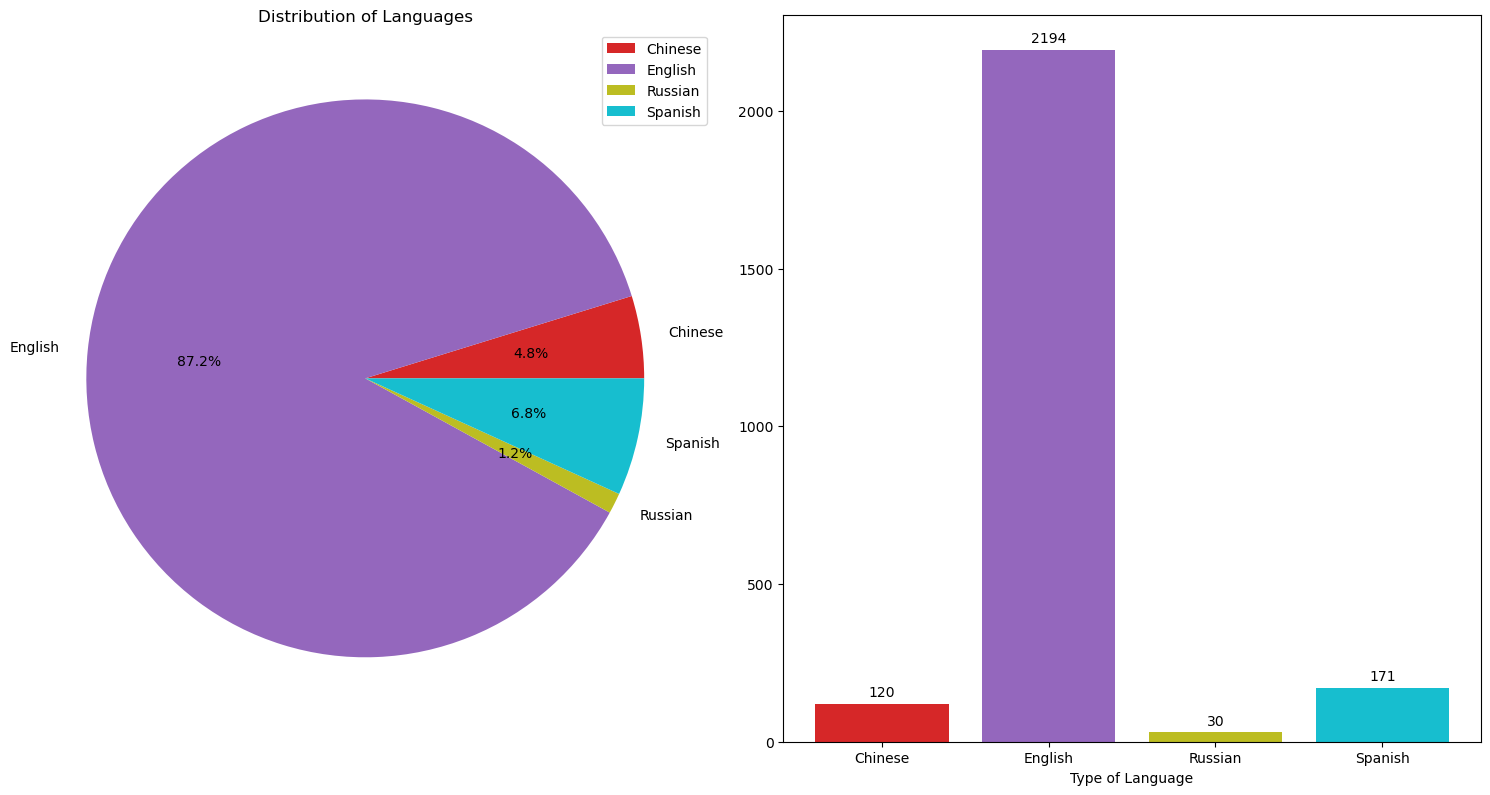

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
pie = plt.pie(dhhl_language.values,labels=dhhl_language.index,autopct='%1.1f%%',colors=['#d62728', '#9467bd','#bcbd22', '#17becf'])
plt.title('Distribution of Languages')
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
bars = plt.bar(dhhl_language.index, dhhl_language.values, color=['#d62728', '#9467bd','#bcbd22', '#17becf'])
plt.bar_label(bars, label_type='edge', padding=3)
plt.xlabel('Type of Language')
plt.tight_layout()
plt.show()


In [ ]:
dhhl = dhhl[dhhl['num_vehicles'] != '995']
dhhl_numvehicles = dhhl.groupby('num_vehicles').size()

print(f"The distribution of number of vehicles in households:\n{dhhl_numvehicles}")

The distribution of number of vehicles in households:
num_vehicles
0    1272
1     922
2     261
3      46
4       7
5       5
6       1
8       1
dtype: int64


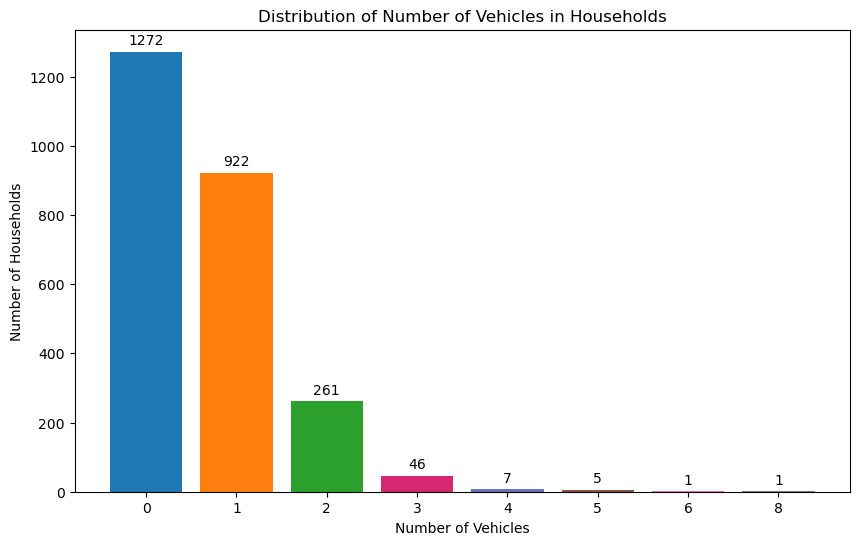

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', "#d62770", "#6774bd", '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', "#17cf45"]


x_positions = range(len(dhhl_numvehicles))

plt.figure(figsize=(10,6))
bar2 = plt.bar(x_positions, dhhl_numvehicles.values, color=colors[:len(dhhl_numvehicles)])
plt.bar_label(bar2, padding=3)

plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Households')
plt.title('Distribution of Number of Vehicles in Households')
plt.xticks(x_positions, dhhl_numvehicles.index)

plt.show()


In [ ]:
dhhl = dhhl[~dhhl['num_people'].isin(['995'])]
dhhl_numpeople = dhhl.groupby('num_people').size()

print(f"The distribution of number of people in households:\n{dhhl_numpeople}")

The distribution of number of people in households:
num_people
1    808
2    850
3    406
4    284
5    102
6     47
7     11
8      5
9      2
dtype: int64


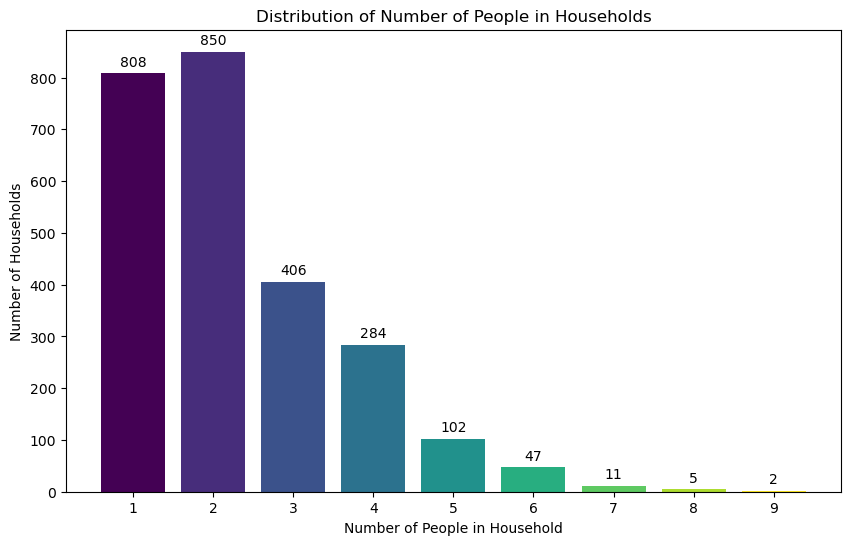

In [ ]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(dhhl_numpeople)))

plt.figure(figsize=(10,6))
bar1 = plt.bar(dhhl_numpeople.index, dhhl_numpeople.values, color=colors)
plt.bar_label(bar1, padding=3)
plt.xlabel('Number of People in Household')
plt.ylabel('Number of Households')
plt.title('Distribution of Number of People in Households')
plt.xticks(dhhl_numpeople.index)
plt.show()

## Understanding Trip Data
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

In [ ]:
for i in range(len(dtrp.columns)):
    print(dtrp.columns[i])

hh_id
person_id
person_num
day_id
travel_dow
day_num
is_complete
travel_date
linked_trip_id
linked_leg_num
trip_id
trip_num
day_is_complete
arrive_dow
depart_dow
o_in_region
o_county
d_in_region
d_county
mode_type_nyc
r_mode_type_nyc
mode_1
mode_2
mode_3
mode_priority_nyc
transit_access
r_transit_access
transit_egress
r_transit_egress
park_location
park_type
park_pay
park_cost
ev_charge_station
ev_charge_station_level_1
ev_charge_station_level_2
ev_charge_station_level_3
ev_charge_station_level_4
ev_charge_station_level_5
ev_charge_station_level_997
ev_charge_station_level_998
tnc_type
taxi_type
taxi_pay
taxi_cost
transit_type
bike_park_loc
scooter_park_location
num_travelers
num_hh_travelers
num_non_hh_travelers
hh_member_1
hh_member_2
hh_member_3
hh_member_4
hh_member_5
hh_member_6
hh_member_7
hh_member_8
hh_member_9
hh_member_10
hh_member_11
hh_member_12
driver
o_purpose
o_purpose_category
d_purpose
d_purpose_category
d_purpose_category_linked
r_d_purpose_category_linked
work_trip
d

In [ ]:
# Total number of trips
dtrp.shape[0]

86339

In [ ]:
dtrp = dtrp[dtrp['r_mode_type_nyc'] != 995]


trip_mode_type = {1:'Vehicle',
                  2:'Bus',
                  3:'Rail',
                  4:'Walk',
                  5:'Bike',
                  6:'Other'}

dtrp['mode_type'] = dtrp['r_mode_type_nyc'].map(trip_mode_type)



trip_mode = dtrp.groupby('mode_type').size()

print(f"The trip mode counts are:\n{trip_mode}")

The trip mode counts are:
mode_type
Bike        1958
Bus         4456
Other       1102
Rail       15944
Vehicle    23014
Walk       36992
dtype: int64


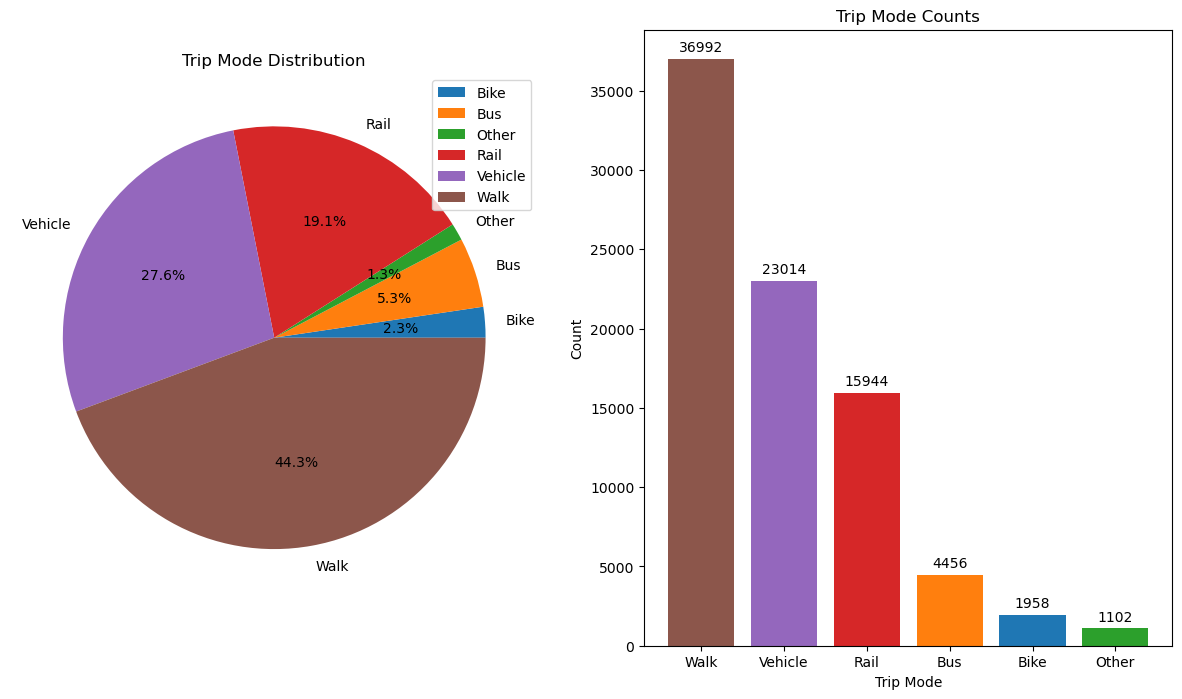

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.pie(trip_mode.values, labels=trip_mode.index, colors=colors,autopct='%1.1f%%')
plt.title('Trip Mode Distribution')
plt.legend()

plt.subplot(1,2,2)
order = trip_mode.sort_values(ascending=False).index
trip_mode_sorted = trip_mode.loc[order]
colors_sorted = [colors[trip_mode.index.get_loc(i)] for i in order]

bar3 = plt.bar(order, trip_mode_sorted, color=colors_sorted)
plt.bar_label(bar3,padding=3)
plt.title('Trip Mode Counts')
plt.xlabel('Trip Mode')
plt.ylabel('Count')
plt.show()

In [ ]:
dtrp = dtrp[(dtrp['d_purpose_category'] != -1) & (dtrp['d_purpose_category'] != 99)]

trip_purpose_type = {1:'Home',
                     2:'Work',
                     3:'Work related',
                     4:'School',
                     5:'School related',
                     6:'Escort',
                     7:'Shopping',
                     8:'Meal',
                     9:'Social/Recreation',
                     10:'Errand',
                     11:'Change mode',
                     12:'Overnight',
                     13:'Other'}

dtrp['purpose_type'] = dtrp['d_purpose_category'].map(trip_purpose_type)

trip_purpose = dtrp.groupby('purpose_type').size()

trip_purpose

purpose_type
Change mode          26672
Errand                3309
Escort                4290
Home                 16553
Meal                  6311
Other                  442
Overnight             2661
School                 329
School related         392
Shopping              6507
Social/Recreation     7525
Work                  3866
Work related          4562
dtype: int64

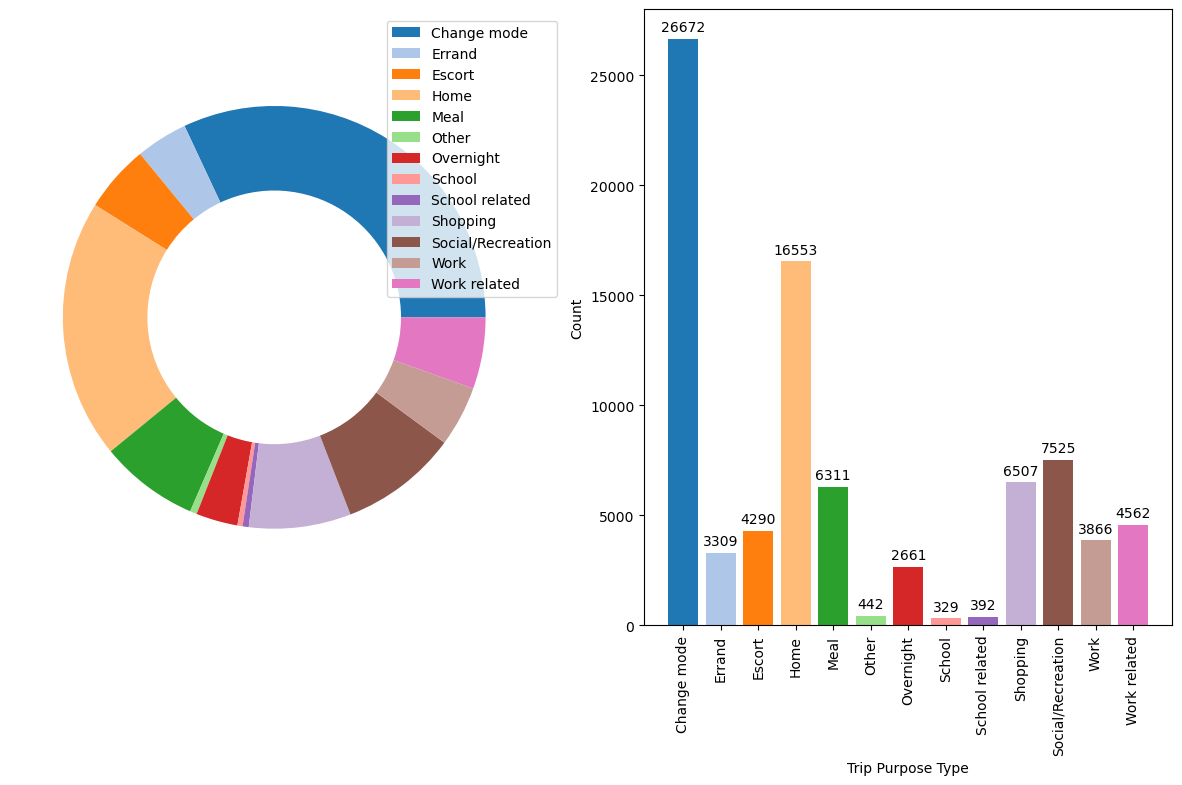

In [ ]:
cmap = plt.get_cmap('tab20')
colors = cmap.colors

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.pie(trip_purpose.values, colors=colors, wedgeprops={'width': 0.4})
plt.legend(trip_purpose.index, loc='center left',bbox_to_anchor=(0.7, 0.8))

plt.subplot(1, 2, 2)
bar3 = plt.bar(trip_purpose.index, trip_purpose.values, color=colors)
plt.bar_label(bar3,padding=3)
plt.xlabel('Trip Purpose Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Undersytanding Data On Participated Households, Persons, and Vehicles
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.


## Understanding Trip Data
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

## Exploring Zones
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.

In [ ]:
dzon.head(15)

# Part 2: Cross-Classification to Predict Future Trips
    Select attributes for the classification, create data set for the analysis, and identify average number of trips made by each group for 2022. Create future trip production based on assumed modifications of the future households and identify number of trips produced by each zone in the future. For trip attraction, consider the same share as in 2022, with total number of trips same as future production.

## Cross-Classification Results Discussion

    How future number of trips will change? How you CC analysis can be improved?


# Part 3: Trip Distribution 
    Choose approach to conduct trip distribution step for the future transportation demand, prepare data for this step and implement it. 

## Trip Distribution Results Discussion

    How future distribution is different compared to trip distribution in 2022? Provide at least 1 graph to support your discussion.


# Part 4: Buid a Mode Choice Model
## Choose Model and Estimated Parameters
    Build a discrete choice models for at least 2 OD pairs for 2022 data.



## Discuss Resulted Model Validity
    Only reasonable models should be included in the report. To increase the likelihood to generate the model with a good fit, use OD-pairs with largest number of predicted trips. 


## Mode Choice Model Results Discussions
    Discuss R-squired, intercept value, signs and significance of estimated parameters. 
    Discuss multiple noticeable observations based on estimated parameters: what unexpected significant factors you have found? Is there a difference in the models for different evaluated OD-pairs? 


Part 5: Additional Topic (Select Only One and change this title accordingly)

1)	New Yorkers’ Commute behavior
2)	New Yorkers’ Experiences of and Opinions on Walking and Transit usage.
3)	New Yorkers’ Experiences of and Opinions on Bicycle mode and Micro-Mobility.
4)	The Equity of Access to Transportation across the City


# Conclusions
    Discuss your project experience, how you have benefited from the project.

# References

Add your references here if any. 

# Report preparation
The project reports should be prepared and submitted using Jupyter Notebook and it must include all mandatory section and one alternative section. All statements in discussion section should be supported by results, present plots to make your discussion complete. <font color='red'> Supplement your code with proper comments, introduce block of code using markdown cells if necessary, explaining the purpose of the following up code and what the cell output presents, use descriptive names for variables and functions. </font> Your final report should be prepared in a way that is understandable to transportation engineers who does not know how to use Jupyter Notebook and Python code. 
To submit your report, run all cells in the prepared Jupyter Notebook, save it as a pdf and submit to UB BrightSpace. Before submitting, make sure that all output cells, figures, and tables are displayed correctly. Report is due on December 11, 2025, via UB BrightSpace.

